In [1]:
##Don't run this chunk of code! It will take 4 hours to run(even on GPU). Run from the 7th chunk onwards

import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

trafficdata = pd.read_csv("C:/GRAB AI CHALLENGE/Traffic Management/training.csv")

In [7]:
#Preprocessing
trafficdata.head()

,day,timestamp,demand,latitude,longtitude
0,14,2:00,0.002867,22.607803,-36.475639
1,37,6:15,0.058792,22.607803,-36.475639
2,45,1:00,0.006552,22.607803,-36.475639
3,39,5:15,0.007625,22.607803,-36.475639
4,58,2:45,0.011352,22.607803,-36.475639
5,58,2:30,0.030095,22.607803,-36.475639
6,48,10:30,0.046790,22.607803,-36.475639
7,10,22:15,0.004221,22.607803,-36.475639
8,34,5:30,0.000046,22.607803,-36.475639
9,21,5:45,0.050540,22.607803,-36.475639


In [39]:
trafficdata['latitude'] = 0
trafficdata['longtitude'] = 0
len(trafficdata)

1048575

In [20]:
import sys
!{sys.executable} -m pip install geohash-hilbert

  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Running setup.py bdist_wheel for geohash-hilbert: started
  Running setup.py bdist_wheel for geohash-hilbert: finished with status 'done'
  Stored in directory: C:\Users\u\AppData\Local\pip\Cache\wheels\6c\73\a1\c8f1bca3531cefc4c23e9a410df581e85cf85dafc90cbe473d
Successfully built geohash-hilbert


  Missing build time requirements in pyproject.toml for geohash-hilbert from https://files.pythonhosted.org/packages/bb/b9/5b506da137e6cb582792b3101ca14863a3e4c669572515aedf496b7b868c/geohash-hilbert-1.3.1.tar.gz#sha256=d9d8b38274ce95b0f932b69ea9bba4303198df38963196755b23179019068650: 'setuptools' and 'wheel'.
  This version of pip does not implement PEP 517 so it cannot build a wheel without 'setuptools' and 'wheel'.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [53]:
import geohash_hilbert as ghh
for i in range(200):
    decodedgeohash = ghh.decode(trafficdata.loc[i,"geohash6"])
    trafficdata.loc[i,"latitude"] = decodedgeohash[0]
    trafficdata.loc[i,"longtitude"] = decodedgeohash[1]
    print(i)

trafficdata

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
8.458574295043945


In [51]:
export_csv = trafficdata.to_csv (r'C:/GRAB AI CHALLENGE/Traffic Management/FINALNEWTRAINING.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Ron\\Desktop\\export_dataframe.csv'

In [9]:
##RUN FROM THIS CHUNK ONWARDS

import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

trafficdata = pd.read_csv("C:/GRAB AI CHALLENGE/Traffic Management/FINALNEWTRAINING.csv")
trafficdata = trafficdata.drop(columns="geohash6")
print(trafficdata.shape)

(1048575, 5)


In [10]:
trafficdata

,day,timestamp,demand,latitude,longtitude
0,14,2:00,0.002867,22.607803,-36.475639
1,37,6:15,0.058792,22.607803,-36.475639
2,45,1:00,0.006552,22.607803,-36.475639
3,39,5:15,0.007625,22.607803,-36.475639
4,58,2:45,0.011352,22.607803,-36.475639
5,58,2:30,0.030095,22.607803,-36.475639
6,48,10:30,0.046790,22.607803,-36.475639
7,10,22:15,0.004221,22.607803,-36.475639
8,34,5:30,0.000046,22.607803,-36.475639
9,21,5:45,0.050540,22.607803,-36.475639


In [11]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
print(trafficdata.dtypes)

day             int64
timestamp      object
demand        float64
latitude      float64
longtitude    float64
dtype: object


In [4]:
#dateparse = lambda times: pd.datetime.strptime(times, '%H:%M')
#trafficdata = pd.read_csv('C:/GRAB AI CHALLENGE/Traffic Management/FINALNEWTRAINING.csv', parse_dates=['timestamp'], index_col='timestamp',date_parser=dateparse)
#trafficdata.head()

,geohash6,day,demand,latitude,longtitude
timestamp,,,,,
1900-01-01 02:00:00,qp02yc,14,0.002867,22.607803,-36.475639
1900-01-01 06:15:00,qp02yc,37,0.058792,22.607803,-36.475639
1900-01-01 01:00:00,qp02yc,45,0.006552,22.607803,-36.475639
1900-01-01 05:15:00,qp02yc,39,0.007625,22.607803,-36.475639
1900-01-01 02:45:00,qp02yc,58,0.011352,22.607803,-36.475639


In [21]:
trafficdata['timestamp'] = trafficdata.timestamp.astype(str)

In [22]:
print(trafficdata.dtypes)

day             int64
timestamp      object
demand        float64
latitude      float64
longtitude    float64
dtype: object


In [38]:
trafficdata['timevalue'] = 0

for k in range(len(trafficdata)): 
    a = trafficdata.loc[k,'timestamp']
    timevalue = 0
    if len(a) == 4: 
        timevalue = int(a[0]) * 60 + int(a[2]) * 10 + int(a[3]) 
    if len(a) == 5: 
        timevalue = int(a[0]) * 10 * 60 + int(a[1]) * 60 + int(a[3]) * 10 + int(a[4])
    trafficdata.loc[k,"timevalue"] = timevalue
    
export_csv1 = trafficdata.to_csv (r'C:/GRAB AI CHALLENGE/Traffic Management/FINALNEWTRAINING1.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

4.69903564453125


In [45]:
trafficdata = pd.read_csv("C:/GRAB AI CHALLENGE/Traffic Management/FINALNEWTRAINING1.csv")

In [46]:
trafficdata = trafficdata.drop(columns="timestamp")

In [47]:
trafficdata

,day,demand,latitude,longtitude,timevalue
0,14,0.002867,22.607803,-36.475639,120
1,37,0.058792,22.607803,-36.475639,375
2,45,0.006552,22.607803,-36.475639,60
3,39,0.007625,22.607803,-36.475639,315
4,58,0.011352,22.607803,-36.475639,165
5,58,0.030095,22.607803,-36.475639,150
6,48,0.046790,22.607803,-36.475639,630
7,10,0.004221,22.607803,-36.475639,1335
8,34,0.000046,22.607803,-36.475639,330
9,21,0.050540,22.607803,-36.475639,345


In [48]:
#Check for duplicate entries, where geohash6, day and time are the same 
dftrafficdata = pd.DataFrame(trafficdata, columns=['day', 'demand', 'latitude', 'longtitude', 'timevalue'])
duplicateRowsDF = dftrafficdata[dftrafficdata.duplicated()]
print(duplicateRowsDF)

Empty DataFrame
Columns: [day, demand, latitude, longtitude, timevalue]
Index: []


In [49]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

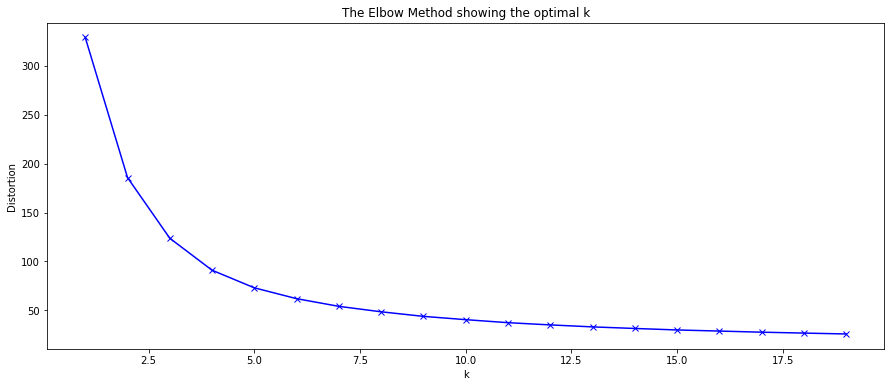

In [50]:
# k means determine k
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(trafficdata)
    kmeanModel.fit(trafficdata)
    distortions.append(sum(np.min(cdist(trafficdata, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / trafficdata.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [59]:
class K_Means:
    def __init__(self, k =5, tolerance = 0.0001, max_iterations = 500):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations

In [60]:
import math

def Euclidean_distance(self, feat_one, feat_two):
    squared_distance = 0
    #Assuming correct input to the function where the lengths of two features are the same
    for i in range(len(feat_one)):
            squared_distance += (feat_one[i] - feat_two[i])**2
    ed = sqrt(squared_distances)
    return ed;

In [62]:
#initialize the centroids, the first 'k' elements in the dataset will be our initial centroids
def centroidclass(self):
    for i in range(self.k):
        self.centroids[i] = trafficdata[i]

    for i in range(self.max_iterations):
        self.classes = {}
        for i in range(self.k):
            self.classes[i] = []

        #find the distance between the point and cluster; choose the nearest centroid
        for features in trafficdata:
            distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
            classification = distances.index(min(distances))
            self.classes[classification].append(features)

In [63]:
def recalcentroids(self):
    previous = dict(self.centroids)
    #average the cluster datapoints to re-calculate the centroids
    for classification in self.classes:
        self.centroids[classification] = np.average(self.classes[classification], axis = 0)

In [68]:
isOptimal = True

def convergence(self): 
    for centroid in self.centroids:

        original_centroid = previous[centroid]
        curr = self.centroids[centroid]

        if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
            isOptimal = False

        if isOptimal:
            break

In [77]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
km.fit(trafficdata)
colors = 10*["r", "g", "c", "b", "k"]

for centroid in km.cluster_centers_:
    plt.scatter(km.cluster_centers_[centroid][0], km.cluster_centers_[centroid][1], s = 130, marker = "x")
    
for classification in km.classes:
    color = colors[classification]
    for features in km.classes[classification]:
        plt.scatter(features[0], features[1], color = color,s = 30)

plt.show()

IndexError: arrays used as indices must be of integer (or boolean) type

In [79]:
import pandas as pd
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [84]:
#Time series moving average for each different cluster
for centroid in km.cluster_centers_:
    #Normalising the other variables
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled = scaler.fit_transform(centroid.values)
    series = pd.DataFrame(scaled)
    window_size = 50

    series_s = series.copy()
    for i in range(window_size):
        series = pd.concat([series, series_s.shift(-(i+1))], axis = 1)

    series.dropna(axis=0, inplace=True)
    
    #Training and testing for all data based on moving average prediction
    nrow = round(0.8*series.shape[0])
    train = series.iloc[:nrow, :]
    test = series.iloc[nrow:,:]
    
    from sklearn.utils import shuffle
    train = shuffle(train)
    train_X = train.iloc[:,:-1]
    train_y = train.iloc[:,-1]
    test_X = test.iloc[:,:-1]
    test_y = test.iloc[:,-1]
    
    train_X = train_X.values
    train_y = train_y.values
    test_X = test_X.values
    test_y = test_y.values

    train_X = train_X.reshape(train_X.shape[0],train_X.shape[1],1)
    test_X = test_X.reshape(test_X.shape[0],test_X.shape[1],1)
    
    # Define the LSTM model
    model = Sequential()
    model.add(LSTM(input_shape = (len(centroid), 5), output_dim= len(centroid), return_sequences = True))
    model.add(Dropout(0.5))
    model.add(LSTM(256))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation("relu"))
    model.compile(loss="rmse", optimizer="adam")
    model.summary()
    
    start = time.time()
    model.fit(train_X,train_y,batch_size=1000,nb_epoch=2,validation_split=0.1)
    preds = model.predict(test_X)
    preds = scaler.inverse_transform(preds)
    actuals = scaler.inverse_transform(test_y)
    root_mean_squared_error(actuals,preds)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [85]:
def movingaverage_test(n_future_preds):
    preds_moving = []                                   
    moving_test_window = [test_X[0,:].tolist()]          
    moving_test_window = np.array(moving_test_window)    
    
    for i in range(n_future_preds):
        preds_one_step = model.predict(moving_test_window)
        preds_moving.append(preds_one_step[0,0]) # get the value from the numpy 2D array and append to predictions
        preds_one_step = preds_one_step.reshape(1,1,1) 
        moving_test_window = np.concatenate((moving_test_window[:,1:,:], preds_one_step), axis=1) 
        
    preds_moving = scaler.inverse_transform(preds_moving)
    
    return preds_moving

In [86]:
preds_moving = moving_test_window_preds(10)

NameError: name 'moving_test_window_preds' is not defined